In [1]:
import kaggle 
!kaggle competitions download -c kagglex-cohort4


  0%|          | 0.00/2.17M [00:00<?, ?B/s]
 46%|████▌     | 1.00M/2.17M [00:01<00:01, 689kB/s]
 92%|█████████▏| 2.00M/2.17M [00:01<00:00, 1.38MB/s]
100%|██████████| 2.17M/2.17M [00:01<00:00, 1.28MB/s]


In [2]:
import zipfile
zip = zipfile.ZipFile('kagglex-cohort4.zip')
zip.extractall()
zip.close()

# Import Lib

In [548]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [549]:
df = pd.read_csv('train.csv')

**Brand & Model:** Identify the brand or company name along with the specific model of each vehicle.  

**Model Year:** Discover the manufacturing year of the vehicles, crucial for assessing depreciation and technology advancements.  

**Mileage:** Obtain the mileage of each vehicle, a key indicator of wear and tear and potential maintenance requirements.  

**Fuel Type:** Learn about the type of fuel the vehicles run on, whether it's gasoline, diesel, electric, or hybrid.  

**Engine Type:** Understand the engine specifications, shedding light on performance and efficiency.  

**Transmission:** Determine the transmission type, whether automatic, manual, or another variant.  

**Exterior & Interior Colors:** Explore the aesthetic aspects of the vehicles, including exterior and interior color options.  

**Accident History:** Discover whether a vehicle has a prior history of accidents or damage, crucial for informed decision-making.  

**Clean Title:** Evaluate the availability of a clean title, which can impact the vehicle's resale value and legal status.  

**Price:** Access the listed prices for each vehicle, aiding in price comparison and budgeting.  

In [550]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


# Data Cleaning

In [552]:
df['clean_title'].unique()

array(['Yes'], dtype=object)

In [553]:
def count_dash(df):
    return (df == '–').sum()

dash_counts =count_dash(df)

cols_with_dash = dash_counts[dash_counts > 0].index
df[cols_with_dash] = df[cols_with_dash].replace('–', np.nan)

In [554]:
cols_with_dash

Index(['fuel_type', 'engine', 'transmission', 'ext_col', 'int_col'], dtype='object')

In [555]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     53979 non-null  object
 6   engine        53938 non-null  object
 7   transmission  54266 non-null  object
 8   ext_col       54232 non-null  object
 9   int_col       53228 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB


In [556]:
df.sample(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
33632,33632,Audi,Q8 55 Premium Plus,2023,5338,Gasoline,335.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,None reported,Yes,60500
8124,8124,Chevrolet,Corvette Stingray w/3LT,2021,64517,Gasoline,490.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,None reported,Yes,30000
15620,15620,Chevrolet,Tahoe LS,2006,170000,E85 Flex Fuel,295.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,4-Speed A/T,Gray,Gray,At least 1 accident or damage reported,Yes,11000
14465,14465,Cadillac,Escalade ESV Premium Luxury Platinum,2021,54423,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,10-Speed A/T,Black,Brown,At least 1 accident or damage reported,Yes,39750
24191,24191,Jeep,Grand Cherokee Limited,2018,49924,Gasoline,293.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,28500


## Mising Values

In [557]:
df.isnull().sum()

id                 0
brand              0
model              0
model_year         0
milage             0
fuel_type        294
engine           335
transmission       7
ext_col           41
int_col         1045
accident           0
clean_title        0
price              0
dtype: int64

In [558]:
df['fuel_type'].unique()

array(['Gasoline', 'Hybrid', 'E85 Flex Fuel', 'Diesel', nan,
       'Plug-In Hybrid', 'not supported'], dtype=object)

In [559]:
df.groupby('fuel_type')['fuel_type'].count().sort_values(ascending=False)

fuel_type
Gasoline          49439
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
Plug-In Hybrid      182
not supported         4
Name: fuel_type, dtype: int64

In [560]:
df['fuel_type'] = df['fuel_type'].fillna(df['fuel_type'].mode()[0])

In [561]:
df['brand'].nunique()

53

In [562]:
df.groupby('brand')['price'].mean().sort_values(ascending=False).head(10)

brand
Bugatti        1.950995e+06
Ferrari        1.584043e+05
Lamborghini    1.447739e+05
Rolls-Royce    1.313651e+05
Aston          1.178858e+05
McLaren        1.091748e+05
Bentley        1.052118e+05
Lucid          8.418500e+04
Rivian         7.949581e+04
Porsche        6.374215e+04
Name: price, dtype: float64

In [563]:
df['accident'].unique()

array(['None reported', 'At least 1 accident or damage reported'],
      dtype=object)

In [564]:
df.groupby('accident')['accident'].count()

accident
At least 1 accident or damage reported    14377
None reported                             39896
Name: accident, dtype: int64

In [565]:
df['accident'] = df['accident'].fillna(df['accident'].mode()[0])

In [566]:
accident_map = {'At least 1 accident or damage reported': 1, 'None reported': 0}
df['accident'] =df['accident'].apply(lambda x : accident_map[x])

In [567]:
df.groupby('clean_title')['clean_title'].count()

clean_title
Yes    54273
Name: clean_title, dtype: int64

In [568]:
df['clean_title'] = df['clean_title'].fillna('No')

In [569]:
df['brand'].unique()

array(['Ford', 'BMW', 'Jaguar', 'Pontiac', 'Acura', 'Audi', 'GMC',
       'Maserati', 'Chevrolet', 'Porsche', 'Mercedes-Benz', 'Tesla',
       'Lexus', 'Kia', 'Lincoln', 'Dodge', 'Volkswagen', 'Land',
       'Cadillac', 'Mazda', 'RAM', 'Subaru', 'Hyundai', 'MINI', 'Jeep',
       'Honda', 'Hummer', 'Nissan', 'Toyota', 'Volvo', 'Genesis',
       'Mitsubishi', 'Buick', 'INFINITI', 'McLaren', 'Scion',
       'Lamborghini', 'Bentley', 'Suzuki', 'Ferrari', 'Alfa',
       'Rolls-Royce', 'Chrysler', 'Aston', 'Rivian', 'Lotus', 'Saturn',
       'Lucid', 'Mercury', 'Maybach', 'FIAT', 'Plymouth', 'Bugatti'],
      dtype=object)

In [570]:
df['transmission'].fillna(df['transmission'].mode()[0], inplace=True)
df['engine'].fillna(df['engine'].mode()[0], inplace=True)
df['ext_col'].fillna(df['ext_col'].mode()[0], inplace=True)
df['int_col'].fillna(df['int_col'].mode()[0], inplace=True)

In [571]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  int64 
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 5.4+ MB


# Feature Engineering

In [572]:
df.sample(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
12603,12603,BMW,X6 M Base,2018,48000,Gasoline,567.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,0,Yes,26999
5122,5122,Buick,LaCrosse Base,2017,54000,Gasoline,310.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,0,Yes,21000
15925,15925,Chevrolet,Suburban LTZ,2016,11250,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Beige,0,Yes,18500
30403,30403,Toyota,Camry Hybrid XLE,2007,94448,Hybrid,200.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,A/T,Green,Black,1,Yes,4800
36245,36245,BMW,X6 xDrive35i,2017,48000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Brown,0,Yes,26990


In [573]:
df['transmission_type'] = df['transmission'].apply(lambda x: 'Automatic' if 'a/t' in x.lower() or 'automatic' in x.lower() else 'Manual')

In [574]:
#df['milage'] = df['milage'].str.replace(r'[^\d.]', '', regex=True).astype(float)
#df['price'] = df['price'].str.replace(r'[^\d.]', '', regex=True).astype(float)

In [575]:
def extract_litre_eng(engine_desc):
    match = re.search(r'(\d+(\.\d+)?)\s*[Ll](?:iter)?', engine_desc)
    return float(match.group(1)) if match else None

df['engine_litre'] = df['engine'].apply(extract_litre_eng)
df['engine_litre'].fillna(df['engine_litre'].mode()[0], inplace=True)

In [576]:
def extract_hp(engine_desc):
    match  = re.search(r'(\d+(\.\d+)?)HP', engine_desc)
    return float(match.group(1)) if match else None

df_hp = pd.DataFrame()
df_hp['engine'] = df['engine']
df_hp['hp'] = df_hp['engine'].apply(extract_hp)
print('Hp Mean : ',df_hp['hp'].mean())
print('Hp Mode : ',df_hp['hp'].mode()[0])

Hp Mean :  331.4882593816146
Hp Mode :  300.0


In [577]:
df['hp'] = df['engine'].apply(extract_hp)
df['hp'].fillna(df['hp'].mode()[0], inplace=True)

In [578]:
def extract_cylinders(engine_desc):
    match = re.search(r'\b([VvIi]\d+)\b', engine_desc)
    if match:
        config = match.group(1)
        return int(config[1:])  

    match = re.search(r'(\d+(\.\d+)?)\s*L', engine_desc)
    if match:
        displacement = float(match.group(1))
        if displacement <= 2.5:
            return 4  
        elif displacement <= 3.8:
            return 6  
        else:
            return 8  
    return None


df['cylinders'] = df['engine'].apply(extract_cylinders)
df['cylinders'].fillna(df['cylinders'].mode()[0], inplace=True)

In [579]:
df['transmission'].unique()

array(['10-Speed A/T', '6-Speed M/T', '6-Speed A/T',
       'Transmission w/Dual Shift Mode', 'A/T', '5-Speed M/T',
       '7-Speed A/T', '5-Speed A/T', '8-Speed A/T',
       'Transmission Overdrive Switch', '9-Speed Automatic',
       '7-Speed M/T', '10-Speed Automatic', '6-Speed Automatic', 'M/T',
       '5-Speed Automatic', 'CVT Transmission', '9-Speed A/T',
       '8-Speed Automatic', '4-Speed A/T', 'Automatic', '1-Speed A/T',
       '8-Speed Automatic with Auto-Shift', '7-Speed DCT Automatic',
       'Automatic CVT', '7-Speed Automatic',
       '7-Speed Automatic with Auto-Shift', '4-Speed Automatic',
       '6-Speed Automatic with Auto-Shift', '6-Speed Manual',
       '7-Speed Manual',
       '6-Speed Electronically Controlled Automatic with O',
       '1-Speed Automatic', '10-Speed Automatic with Overdrive',
       '8-Speed Manual', '2-Speed A/T', 'CVT-F', 'F',
       '9-Speed Automatic with Auto-Shift', '7-Speed', 'Variable',
       'SCHEDULED FOR OR IN PRODUCTION', '6-Speed', 

In [580]:
def extract_speed(transmission_desc):
    match = re.search(r'(\d+)[- ]?(Speed|Spd)', transmission_desc, re.IGNORECASE)
    if match:
        return match.group(1)
    else:
        return None

extract_speed('6-Speed A/T')

'6'

In [581]:
df['transmission_speed'] = df['transmission'].apply(extract_speed)

In [582]:
df[df['transmission_speed'].isnull()]['transmission'].unique()

array(['Transmission w/Dual Shift Mode', 'A/T',
       'Transmission Overdrive Switch', 'M/T', 'CVT Transmission',
       'Automatic', 'Automatic CVT', 'CVT-F', 'F', 'Variable',
       'SCHEDULED FOR OR IN PRODUCTION'], dtype=object)

In [583]:
#df.loc[df['transmission'] == '2', 'transmission_speed'] = '2'
#df.loc[df['transmission'] == 'Single-Speed Fixed Gear', 'transmission_speed'] = '1'

In [584]:
df['transmission_speed'].fillna('5', inplace= True)

In [585]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  54273 non-null  int64  
 1   brand               54273 non-null  object 
 2   model               54273 non-null  object 
 3   model_year          54273 non-null  int64  
 4   milage              54273 non-null  int64  
 5   fuel_type           54273 non-null  object 
 6   engine              54273 non-null  object 
 7   transmission        54273 non-null  object 
 8   ext_col             54273 non-null  object 
 9   int_col             54273 non-null  object 
 10  accident            54273 non-null  int64  
 11  clean_title         54273 non-null  object 
 12  price               54273 non-null  int64  
 13  transmission_type   54273 non-null  object 
 14  engine_litre        54273 non-null  float64
 15  hp                  54273 non-null  float64
 16  cyli

In [586]:
df.sample(5)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,transmission_type,engine_litre,hp,cylinders,transmission_speed
24696,24696,BMW,330 i xDrive,2017,59203,Gasoline,248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Black,0,Yes,27000,Automatic,2.0,248.0,4.0,8
19375,19375,Land,Rover Range Rover Sport HST MHEV,2020,52000,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,A/T,Gold,Black,0,Yes,8300,Automatic,3.0,395.0,6.0,5
43849,43849,Mercedes-Benz,G-Class G 550 4MATIC,2020,22480,Gasoline,416.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,0,Yes,64900,Automatic,4.0,416.0,8.0,5
4252,4252,Audi,A6 3.0T Prestige,2017,89500,Gasoline,310.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Gray,Black,0,Yes,8500,Automatic,3.0,310.0,6.0,6
38495,38495,Porsche,Panamera 4,2016,72393,Gasoline,310.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Black,Black,0,Yes,52590,Automatic,3.6,310.0,6.0,8


In [587]:
cols_drop = ['id', 'engine','transmission', 'model', 'clean_title' ]
df.drop(columns=cols_drop,axis=1, inplace=True)

In [588]:
#clean_title_map = {'Yes': 1, 'No': 0}
#df['clean_title'] = df['clean_title'].apply(lambda x : clean_title_map[x])

In [589]:
df.sample(5)

,brand,model_year,milage,fuel_type,ext_col,int_col,accident,price,transmission_type,engine_litre,hp,cylinders,transmission_speed
51420,Honda,2008,122000,Gasoline,Blue,Gray,1,10500,Automatic,2.4,166.0,4.0,5
30658,Chevrolet,2011,140401,E85 Flex Fuel,Red,Beige,1,22000,Automatic,5.3,320.0,8.0,6
1099,Mercedes-Benz,2011,47000,Gasoline,Black,Black,0,48990,Automatic,4.7,335.0,8.0,7
7004,Audi,2011,132000,Gasoline,White,Black,1,10999,Manual,3.7,305.0,6.0,5
44217,Chevrolet,2002,227000,Gasoline,Brown,Beige,0,3850,Manual,3.5,220.0,6.0,6


In [590]:
for i in df.columns:
    print(f"{i}: {df[i].nunique()} , {df[i].dtype}")

brand: 53 , object
model_year: 34 , int64
milage: 3212 , int64
fuel_type: 6 , object
ext_col: 259 , object
int_col: 123 , object
accident: 2 , int64
price: 1481 , int64
transmission_type: 2 , object
engine_litre: 60 , float64
hp: 341 , float64
cylinders: 6 , float64
transmission_speed: 9 , object


In [591]:
unique_counts = [(i, df[i].nunique()) for i in df.columns]
unique_counts.sort(key=lambda x: x[1], reverse=True)
unique_counts

[('milage', 3212),
 ('price', 1481),
 ('hp', 341),
 ('ext_col', 259),
 ('int_col', 123),
 ('engine_litre', 60),
 ('brand', 53),
 ('model_year', 34),
 ('transmission_speed', 9),
 ('fuel_type', 6),
 ('cylinders', 6),
 ('accident', 2),
 ('transmission_type', 2)]

In [592]:
df.sample(5)

,brand,model_year,milage,fuel_type,ext_col,int_col,accident,price,transmission_type,engine_litre,hp,cylinders,transmission_speed
1255,Toyota,2017,50850,Gasoline,Gray,Gray,0,38000,Automatic,5.7,381.0,8.0,6
47635,Mercedes-Benz,2016,74000,Gasoline,Black,Black,1,22000,Automatic,4.0,416.0,8.0,5
2414,Bentley,2020,21450,Gasoline,Black,Black,1,41900,Automatic,6.0,600.0,8.0,8
8626,Ford,2021,25000,Diesel,Gray,Black,0,78000,Automatic,6.7,440.0,8.0,6
37527,Porsche,2011,75000,Gasoline,Red,Beige,0,18500,Manual,2.9,265.0,6.0,5


# Encoding

In [593]:
target_encode = ['brand', 'ext_col', 'int_col']
onehot_encode = ['fuel_type','transmission_speed']
label_encode = ['transmission_type']
standard_scale = ['milage', 'hp','cylinders' ,'engine_litre']
min_max_scale = ['model_year']

## Scaling

In [594]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

df[standard_scale] = scalar.fit_transform(df[standard_scale])

In [595]:
from sklearn.preprocessing import StandardScaler
import pickle
ss_price = StandardScaler()
df['price'] = ss_price.fit_transform(df[['price']])
with open('encoders/scaler_price.pkl', 'wb') as file:
    pickle.dump(ss_price, file)

## Encode

In [596]:
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pickle

target_encoder = ce.TargetEncoder(cols=target_encode)
df[target_encode] = target_encoder.fit_transform(df[target_encode], df['price'])

onehot_encoder  = OneHotEncoder(drop='first', sparse=False)
onehot_encoded = onehot_encoder.fit_transform(df[onehot_encode])
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(onehot_encode))

df = pd.concat([df, onehot_encoded_df], axis=1)
df.drop(columns=onehot_encode, inplace=True)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [597]:
label_encoders = {}
for col in label_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    with open(f'encoders/label_encoder_{col}.pkl', 'wb') as file:
        pickle.dump(le, file)


In [598]:
from sklearn.preprocessing import MinMaxScaler

mm_model_yr = MinMaxScaler()
df['model_year'] = mm_model_yr.fit_transform(df[['model_year']])
with open('encoders/mm_model_yr.pkl', 'wb') as file:
    pickle.dump(mm_model_yr, file)

file.close()

In [599]:
import pickle

with open('encoders/target_encoder.pkl', 'wb') as file:
    pickle.dump(target_encoder, file)

with open('encoders/onehot_encoder.pkl', 'wb') as file:
    pickle.dump(onehot_encoder, file)


with open('encoders/scalar.pkl', 'wb') as file:
    pickle.dump(scalar, file)

In [618]:
df.sample(5)

,brand,model_year,milage,ext_col,int_col,accident,price,transmission_type,engine_litre,hp,...,fuel_type_Plug-In Hybrid,fuel_type_not supported,transmission_speed_10,transmission_speed_2,transmission_speed_4,transmission_speed_5,transmission_speed_6,transmission_speed_7,transmission_speed_8,transmission_speed_9
48398,0.014522,0.64,1.055178,-0.019832,0.026012,0,-0.360030,1,-0.532528,-0.281280,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
47268,-0.116924,0.94,-1.017380,-0.019832,0.026012,0,0.079375,0,-0.081927,-0.425139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29712,0.075971,0.88,-0.245719,-0.061607,0.026012,0,-0.112851,1,1.870677,1.205258,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
37664,-0.278568,0.84,0.064472,-0.019832,0.204476,1,-0.284494,1,-1.283529,-1.144432,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
36297,-0.029208,0.84,-0.028853,-0.116002,0.026012,0,-0.243299,1,-0.532528,0.035209,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Model Train

In [55]:
x = df.drop(columns=['price'])
y = df['price']

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [57]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = model.predict(x_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 0.25812471441769796
MSE: 0.6095187047240258
RMSE: 0.780716789062478


In [59]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = dtr.predict(x_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 0.33669866061125825
MSE: 1.6462656258954613
RMSE: 1.2830688313163332


In [1]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred = knn.predict(x_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

NameError: name 'x_train' is not defined

In [61]:
x_train.sample(5)

,brand,model_year,milage,fuel_type,ext_col,int_col,accident,clean_title,transmission_type,engine_litre,hp,cylinders,transmission_speed
30967,3,21,0.341870,2,249,6,1,1,0,-1.283529,-1.134841,-1.505340,-0.747857
10610,4,24,-0.173298,2,17,9,0,1,1,-0.532528,-0.281280,-0.162959,-0.747857
47734,11,29,-0.365099,2,166,9,1,1,0,1.870677,3.622083,1.179422,1.217178
53882,35,24,-0.198204,2,100,9,1,1,0,-1.283529,-0.847124,-1.505340,1.872190
255,0,19,0.857037,2,212,6,1,1,1,-0.983128,-1.230747,-1.505340,-0.747857


# Test Data 

In [619]:
test1 = pd.read_csv('test.csv')

In [620]:
import pandas as pd
test = pd.read_csv('test.csv')

dash_counts =count_dash(test)

cols_with_dash = dash_counts[dash_counts > 0].index
test[cols_with_dash] = test[cols_with_dash].replace('–', np.nan)

test['fuel_type'] = test['fuel_type'].fillna(test['fuel_type'].mode()[0])
test['accident'] = test['accident'].fillna(test['accident'].mode()[0])

accident_map = {'At least 1 accident or damage reported': 1, 'None reported': 0}
test['accident'] =test['accident'].apply(lambda x : accident_map[x])

test['transmission'].fillna(test['transmission'].mode()[0], inplace=True)
test['engine'].fillna(test['engine'].mode()[0], inplace=True)
test['ext_col'].fillna(test['ext_col'].mode()[0], inplace=True)
test['int_col'].fillna(test['int_col'].mode()[0], inplace=True)


test['transmission_type'] = test['transmission'].apply(lambda x: 'Automatic' if 'a/t' in x.lower() or 'automatic' in x.lower() else 'Manual')

test['engine_litre'] = test['engine'].apply(extract_litre_eng)
test['engine_litre'].fillna(test['engine_litre'].mode()[0], inplace=True)

test['hp'] = test['engine'].apply(extract_hp)
test['hp'].fillna(test['hp'].mode()[0], inplace=True)


test['cylinders'] = test['engine'].apply(extract_cylinders)
test['cylinders'].fillna(test['cylinders'].mode()[0], inplace=True)


test['transmission_speed'] = test['transmission'].apply(extract_speed)

test['transmission_speed'].fillna('5', inplace= True)

cols_drop = ['id', 'engine','transmission', 'model', 'clean_title']
test.drop(columns=cols_drop,axis=1, inplace=True)



In [621]:
test.sample(5)

,brand,model_year,milage,fuel_type,ext_col,int_col,accident,transmission_type,engine_litre,hp,cylinders,transmission_speed
36006,Nissan,2011,125500,Gasoline,Gray,White,1,Automatic,4.0,261.0,6.0,5
17766,RAM,2021,35003,Gasoline,Bright White Clearcoat,Diesel Gray / Black,0,Automatic,5.7,300.0,8.0,5
415,GMC,2017,45000,Gasoline,White,Beige,0,Automatic,3.6,281.0,6.0,6
18453,Buick,2014,62950,Gasoline,Red,Beige,1,Automatic,3.6,288.0,6.0,6
27368,Subaru,2014,72900,Gasoline,White,Red,0,Manual,2.0,268.0,4.0,5


In [622]:
#Encode and scale test cols
with open('encoders\\target_encoder.pkl', 'rb') as file:
    target_encoder = pickle.load(file)

with open('encoders\\onehot_encoder.pkl', 'rb') as file:
    onehot_encoder = pickle.load(file)

with open('encoders\\scalar.pkl', 'rb') as file:
    scaler = pickle.load(file)

test[target_encode] = target_encoder.transform(test[target_encode])

onehot_encoded = onehot_encoder.transform(test[onehot_encode])
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(onehot_encode))
test = pd.concat([test, onehot_encoded_df], axis=1)
test.drop(columns=onehot_encode, inplace=True)


In [623]:
for col in label_encode:
    with open(f'encoders\\label_encoder_{col}.pkl', 'rb') as file:
        label_encoder = pickle.load(file)
    test[col] = label_encoder.transform(test[col])

In [624]:
with open('encoders\\mm_model_yr.pkl', 'rb') as file:
    mm_model_yr = pickle.load(file)

test['model_year'] = mm_model_yr.transform(test[['model_year']])

In [625]:
test[standard_scale] = scaler.transform(test[standard_scale])
test.head(5)

,brand,model_year,milage,ext_col,int_col,accident,transmission_type,engine_litre,hp,cylinders,...,fuel_type_Plug-In Hybrid,fuel_type_not supported,transmission_speed_10,transmission_speed_2,transmission_speed_4,transmission_speed_5,transmission_speed_6,transmission_speed_7,transmission_speed_8,transmission_speed_9
0,0.108143,0.80,0.005029,-0.019832,-0.155930,0,0,-0.157027,-0.262099,-0.162959,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.117170,0.82,1.095441,-0.116002,0.026012,0,0,-0.157027,-0.521044,-0.162959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.108143,0.82,-0.411404,-0.022022,0.212961,0,0,-1.283529,-0.847124,-1.505340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.116660,0.88,-0.856885,-0.019832,0.212961,1,1,0.969475,1.809465,1.179422,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.014522,0.92,0.341870,-0.019832,0.026012,1,0,-0.532528,0.054390,-0.162959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
test

# Train Data

## RandomForestRegressor

In [134]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

X_train = df.drop(columns=['price'])
y_train = df['price']

scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

model = RandomForestRegressor()

model.fit(X_train, y_train_scaled)

X_test = test.copy()

predictions_scaled = model.predict(X_test)

predictions_original_scale = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()

predictions_df = pd.DataFrame(predictions_original_scale, columns=['Predicted_Price'])




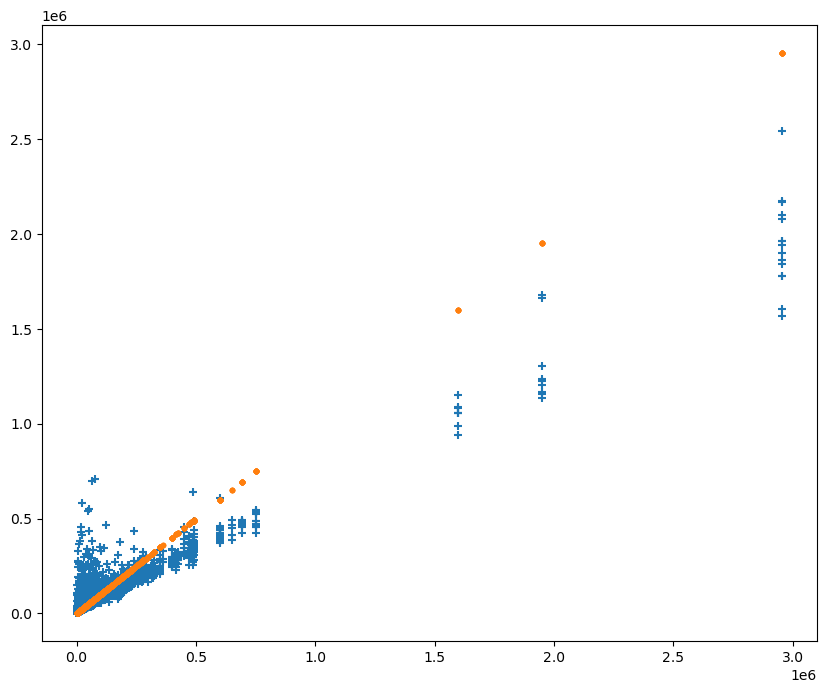

In [135]:
import matplotlib.pyplot as plt


train_predictions_scaled = model.predict(X_train)
train_predictions_original_scale = scaler.inverse_transform(train_predictions_scaled.reshape(-1, 1)).flatten()


plt.figure(figsize=(10,8))
plt.scatter(y_train, train_predictions_original_scale, marker='+', label = 'Predicted Values')
plt.scatter(y_train, y_train, marker='.', label = 'Actual Prices')

## Cross Validation

In [152]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

X_train = df.drop(columns=['price'])
y_train = df['price']

scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

model = RandomForestRegressor()

X_test = test.copy()


kf = KFold(n_splits=5, shuffle=True, random_state=42)

predictions_original_scale = []
scores = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_scaled[train_index], y_train_scaled[val_index]
    
    model.fit(X_train_fold, y_train_fold)

    predictions_test_scaled = model.predict(X_test.values)
    predictions_test_original = scaler.inverse_transform(predictions_test_scaled.reshape(-1, 1)).flatten()
    predictions_original_scale.append(predictions_test_original)



predictions_df = pd.DataFrame(predictions_test_original, columns=['Predicted_Price'])


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Stratified Kfold

In [156]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

X_train = df.drop(columns=['price'])
y_train = df['price']

scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

model = RandomForestRegressor()

X_test = test.copy()

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

predictions_original_scale = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_scaled[train_index], y_train_scaled[val_index]
    
    model.fit(X_train_fold, y_train_fold)

    predictions_test_scaled = model.predict(X_test.values)
    predictions_test_original = scaler.inverse_transform(predictions_test_scaled.reshape(-1, 1)).flatten()
    predictions_original_scale.append(predictions_test_original)

predictions_df = pd.DataFrame(np.column_stack(predictions_original_scale), columns=[f'Fold_{i+1}' for i in range(len(predictions_original_scale))])
predictions_df['Predicted_Price'] = predictions_df.mean(axis=1)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py

## XGBoost

In [163]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
import pandas as pd

X_train = df.drop(columns=['price'])
y_train = df['price']

scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Define XGBoost parameters
params = {
    'objective': 'reg:squarederror',  
    'max_depth': 6,                   
    'learning_rate': 0.1,            
    'n_estimators': 100            
}

model = XGBRegressor(**params)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

predictions_original_scale = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train_scaled[train_index], y_train_scaled[val_index]
    
    model.fit(X_train_fold, y_train_fold)

    predictions_val_scaled = model.predict(X_val_fold)
    predictions_val_original = scaler.inverse_transform(predictions_val_scaled.reshape(-1, 1)).flatten()
    predictions_original_scale.append(predictions_val_original)

# After training on all folds, predict on X_test
predictions_test_scaled = model.predict(X_test.values)
predictions_test_original = scaler.inverse_transform(predictions_test_scaled.reshape(-1, 1)).flatten()

predictions_df = pd.DataFrame(predictions_test_original, columns=['Predicted_Price'])


## Grid Search Cross-Validation for XGBoost

In [49]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

X_train = df.drop(columns=['price'])
y_train = df['price']

X_test = test.copy()

param_grid = {
    'learning_rate': [0.1, 0.01, 0.05],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 1, 1.2],
    'n_estimators': [50, 100, 200, 300]
}


with open('encoders\\scalar.pkl', 'rb') as file:
    scaler = pickle.load(file)
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

model = XGBRegressor(objective='reg:squarederror')

kf = KFold(n_splits=3, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train_scaled)

print("Best parameters found: ", grid_search.best_params_)
print("Lowest RMSE found: ", (-grid_search.best_score_)**0.5)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train_scaled)

predictions_test_scaled = best_model.predict(X_test.values)

with open('encoders\\scalar_price.pkl', 'rb') as file:
    scaler_price = pickle.load(file)
predictions_test_original = scaler_price.inverse_transform(predictions_test_scaled.reshape(-1, 1)).flatten()

predictions_df = pd.DataFrame(predictions_test_original, columns=['Predicted_Price'])


Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}
Lowest RMSE found:  0.9279188282900692


NameError: name 'X_test' is not defined

## Stacking with XGBRegressor and RandomForestRegressor

In [471]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import pandas as pd

X_train = df.drop(columns=['price'])
y_train = df['price']
X_test = test.copy()

X_train_stack, X_val_stack, y_train_stack, y_val_stack = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

with open('encoders\\scalar.pkl', 'rb') as file:
    scaler = pickle.load(file)
y_train_scaled = scaler.fit_transform(y_train_stack.values.reshape(-1, 1)).flatten()
y_val_scaled = scaler.transform(y_val_stack.values.reshape(-1, 1)).flatten()

base_learners = [
    ('xgb', XGBRegressor(objective='reg:squarederror')),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
]

meta_learner = Ridge()

stacking_regressor = StackingRegressor(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=KFold(n_splits=5, shuffle=True, random_state=42)
)

stacking_regressor.fit(X_train_stack, y_train_scaled)



StackingRegressor(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                  estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_...
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                              ('rf', RandomForestRegressor(random_state=42))],
                  final_estimator=Ridge())

In [472]:
predictions_val_scaled = stacking_regressor.predict(X_val_stack)
with open('encoders\\scaler_price.pkl', 'rb') as file:
    scaler_price = pickle.load(file)
predictions_val_original = scaler_price.inverse_transform(predictions_val_scaled.reshape(-1, 1)).flatten()

rmse = mean_squared_error(y_val_stack, predictions_val_original, squared=False)
print("Validation RMSE: ", rmse)

predictions_test_scaled = stacking_regressor.predict(X_test)
predictions_test_original = scaler_price.inverse_transform(predictions_test_scaled.reshape(-1, 1)).flatten()

predictions_df = pd.DataFrame(predictions_test_original, columns=['Predicted_Price'])

Validation RMSE:  46056.042033183694


## Different Models and Ensembling

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


X_train = df.drop(columns=['price'])
y_train = df['price']
X_test = test.copy()

X_train_stack, X_val_stack, y_train_stack, y_val_stack = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_stack_scaled = scaler.fit_transform(X_train_stack)
X_val_stack_scaled = scaler.transform(X_val_stack)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train_stack.values.reshape(-1, 1)).flatten()
y_val_scaled = scaler_y.transform(y_val_stack.values.reshape(-1, 1)).flatten()

base_learners = [
    ('xgb', XGBRegressor(objective='reg:squarederror')),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('et', ExtraTreesRegressor(n_estimators=100, random_state=42)),
    ('lgb', LGBMRegressor(random_state=42)),
    ('gbr', GradientBoostingRegressor(random_state=42)),
    ('svr', SVR())
]

meta_learner = Ridge()

stacking_regressor = StackingRegressor(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=KFold(n_splits=5, shuffle=True, random_state=42)
)

stacking_regressor.fit(X_train_stack_scaled, y_train_scaled)

predictions_val_scaled = stacking_regressor.predict(X_val_stack_scaled)
predictions_val_original = scaler_y.inverse_transform(predictions_val_scaled.reshape(-1, 1)).flatten()

rmse = mean_squared_error(y_val_stack, predictions_val_original, squared=False)
print("Validation RMSE: ", rmse)

predictions_test_scaled = stacking_regressor.predict(X_test)
predictions_test_original = scaler_y.inverse_transform(predictions_test_scaled.reshape(-1, 1)).flatten()

predictions_df = pd.DataFrame(predictions_test_original, columns=['Predicted_Price'])


# Submissions

In [473]:
test_id = test1['id']
submission_df = pd.DataFrame({'id': test_id, 'price': predictions_df['Predicted_Price']})
submission_df.to_csv('submission.csv', index=False)

In [474]:
!kaggle competitions submit -c kagglex-cohort4 -f submission.csv -m "Latest Submission"

Successfully submitted to KaggleX Skill Assessment Challenge



  0%|          | 0.00/896k [00:00<?, ?B/s]
  2%|▏         | 16.0k/896k [00:00<00:34, 26.0kB/s]
 14%|█▍        | 128k/896k [00:01<00:05, 153kB/s]  
 18%|█▊        | 160k/896k [00:01<00:07, 98.0kB/s]
 20%|█▉        | 176k/896k [00:01<00:08, 87.6kB/s]
 21%|██▏       | 192k/896k [00:02<00:09, 77.4kB/s]
 27%|██▋       | 240k/896k [00:02<00:07, 92.7kB/s]
 29%|██▊       | 256k/896k [00:04<00:15, 41.6kB/s]
 30%|███       | 272k/896k [00:04<00:14, 43.9kB/s]
 32%|███▏      | 288k/896k [00:04<00:14, 44.2kB/s]
 34%|███▍      | 304k/896k [00:05<00:13, 46.2kB/s]
 36%|███▌      | 320k/896k [00:05<00:12, 46.1kB/s]
 37%|███▋      | 336k/896k [00:05<00:12, 44.3kB/s]
 39%|███▉      | 352k/896k [00:06<00:12, 43.3kB/s]
 41%|████      | 368k/896k [00:06<00:11, 46.3kB/s]
 43%|████▎     | 384k/896k [00:06<00:10, 48.4kB/s]
 45%|████▍     | 400k/896k [00:08<00:21, 23.2kB/s]
 46%|████▋     | 416k/896k [00:08<00:19, 25.8kB/s]
 62%|██████▏   | 560k/896k [00:09<00:03, 100kB/s] 
 64%|██████▍   | 576k/896k [00:09<00